<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Heart Failure EDA & Mortality Prediction</p></b></h1>

<div style="text-align: center;">
    <img src="https://cvrti.utah.edu/wp-content/uploads/2023/05/Blue-Human-Chest-Diagram-with-Bright-Red-Heart-Causes-of-Heart-Failure-Graphic.jpg" alt="Web Image" title="Web Image Title" />
</div>

# **Author: Muhammad Naeem**
- [LinkedIn](https://www.linkedin.com/in/muhammad-naeem-689645238/)
- [Kaggle](https://www.kaggle.com/muhammadnaeem779/code) 
- [Github](https://github.com/Muhammad-Naeem779)

# **Meta Data**
## Context:
This dataset contains the medical records of 5000 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.

## Attribute Information:

Columns | Description 
---------|----------
**age:** | age of the patient (years)
**anaemia:** | decrease of red blood cells or hemoglobin (boolean)
**creatinine phosphokinase (CPK):** | level of the CPK enzyme in the blood (mcg/L)
**diabetes:** | if the patient has diabetes (boolean)
**ejection fraction:** | percentage of blood leaving the heart at each contraction (percentage)
**high blood pressure:** | if the patient has hypertension (boolean)
**platelets:** | platelets in the blood (kiloplatelets/mL)
**sex:** | woman or man (binary)
**serum creatinine:** | level of serum creatinine in the blood (mg/dL)
**serum sodium:** | level of serum sodium in the blood (mEq/L)
**smoking:** | if the patient smokes or not (boolean)
**time:** | follow-up period (days)

<span style="font-family: cursive; 
            font-size: 36px; 
            padding: 8px 16px; 
            border-radius: 10px; 
            border: 2px solid #52c41a; /* Green */
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); 
            color: #52c41a; /* Green */
            ">
    1 | <span style="color: #52c41a; /* Green */
                     font-style: italic;
                     ">
        Import Packages
    </span>
</span>


# **1. Import Packages**

In [1]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
# machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from catboost.utils import eval_metric

#Evaluation
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

<span style="font-family: cursive; 
            font-size: 36px; 
            padding: 8px 16px; 
            border-radius: 10px; 
            border: 2px solid #52c41a; /* Green */
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); 
            color: #52c41a; /* Green */
            ">
    2 | <span style="color: #52c41a; /* Green */
                     font-style: italic;
                     ">
        Import Dataset
    </span>
</span>

# **2. Import Dataset**

In [2]:
df = pd.read_csv("/kaggle/input/heart-failure-prediction-clinical-records/heart_failure_clinical_records.csv")
df.head().style.set_properties(**{
    'background-color': 'lightgreen',
    'color': 'Black',
    'border-color': 'DarkBlack'
})

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.000000,0,748,0,45,0,263358.030000,1.300000,137,1,1,88,0
1,65.000000,0,56,0,25,0,305000.000000,5.000000,130,1,0,207,0
2,45.000000,0,582,1,38,0,319000.000000,0.900000,140,0,0,244,0
3,60.000000,1,754,1,40,1,328000.000000,1.200000,126,1,0,90,0
4,95.000000,1,582,0,30,0,461000.000000,2.000000,132,1,0,50,1


<span style="font-family: cursive; 
            font-size: 36px; 
            padding: 8px 16px; 
            border-radius: 10px; 
            border: 2px solid #52c41a; /* Green */
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); 
            color: #52c41a; /* Green */
            ">
    3 | <span style="color: #52c41a; /* Green */
                     font-style: italic;
                     ">
        Overview of Data
    </span>
</span>

# **3. Overview of Data**

In [3]:
# Shape of the dataset
print(f'This dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

This dataset contains 5000 rows and 13 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


<span style="font-family: cursive; 
            font-size: 36px; 
            padding: 8px 16px; 
            border-radius: 10px; 
            border: 2px solid #52c41a; /* Green */
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); 
            color: #52c41a; /* Green */
            ">
    4 | <span style="color: #52c41a; /* Green */
                     font-style: italic;
                     ">
        Statistical Summmary
    </span>
</span>

# **4. Statistical Summary**

In [5]:
# Summary statistics
df.describe().T.style.set_properties(**{
    'background-color': 'lightgreen',
    'color': 'Black',
    'border-color': 'DarkBlack'
})

,count,mean,std,min,25%,50%,75%,max
age,5000.000000,60.288736,11.697243,40.000000,50.000000,60.000000,68.000000,95.000000
anaemia,5000.000000,0.474400,0.499394,0.000000,0.000000,0.000000,1.000000,1.000000
creatinine_phosphokinase,5000.000000,586.760600,976.733979,23.000000,121.000000,248.000000,582.000000,7861.000000
diabetes,5000.000000,0.439400,0.496364,0.000000,0.000000,0.000000,1.000000,1.000000
ejection_fraction,5000.000000,37.734600,11.514855,14.000000,30.000000,38.000000,45.000000,80.000000
high_blood_pressure,5000.000000,0.364800,0.481422,0.000000,0.000000,0.000000,1.000000,1.000000
platelets,5000.000000,265075.404370,97999.758622,25100.000000,215000.000000,263358.030000,310000.000000,850000.000000
serum_creatinine,5000.000000,1.369106,1.009750,0.500000,0.900000,1.100000,1.400000,9.400000
serum_sodium,5000.000000,136.808200,4.464236,113.000000,134.000000,137.000000,140.000000,148.000000
sex,5000.000000,0.645600,0.478379,0.000000,0.000000,1.000000,1.000000,1.000000


<span style="font-family: cursive; 
            font-size: 36px; 
            padding: 8px 16px; 
            border-radius: 10px; 
            border: 2px solid #52c41a; /* Green */
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); 
            color: #52c41a; /* Green */
            ">
    5 | <span style="color: #52c41a; /* Green */
                     font-style: italic;
                     ">
        Missing Values
    </span>
</span>

# **5. Missing Values**

In [6]:
# check missing values 
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<span style="font-family: cursive; 
            font-size: 36px; 
            padding: 8px 16px; 
            border-radius: 10px; 
            border: 2px solid #52c41a; /* Green */
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); 
            color: #52c41a; /* Green */
            ">
    6 | <span style="color: #52c41a; /* Green */
                     font-style: italic;
                     ">
        Visualize the Insights of the Data
    </span>
</span>

# **6. Visualize the Insights of the Data**

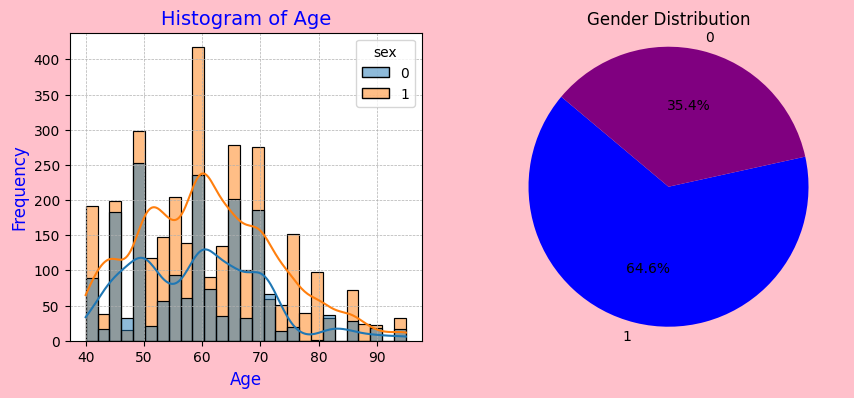

<Figure size 640x480 with 0 Axes>

In [7]:
# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4), facecolor='pink', edgecolor='k')

# Customize the histogram plot
sns.histplot(data=df, x="age", kde=True, ax=ax[0], hue="sex")
# Add grid lines
ax[0].grid(True, linestyle='--', linewidth=0.5)  
# Add title to the plot
ax[0].set_title('Histogram of Age', fontsize=14, color='blue')
# Add axis labels
ax[0].set_xlabel('Age', fontsize=12, color='blue')
ax[0].set_ylabel('Frequency', fontsize=12, color='blue')



# Create the pie chart
gender_counts = df['sex'].value_counts()
sizes = gender_counts.values
labels = gender_counts.index

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'purple'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# add some space between the plots
plt.subplots_adjust(wspace=0.4)
# Show the plot
plt.tight_layout()
plt.show()

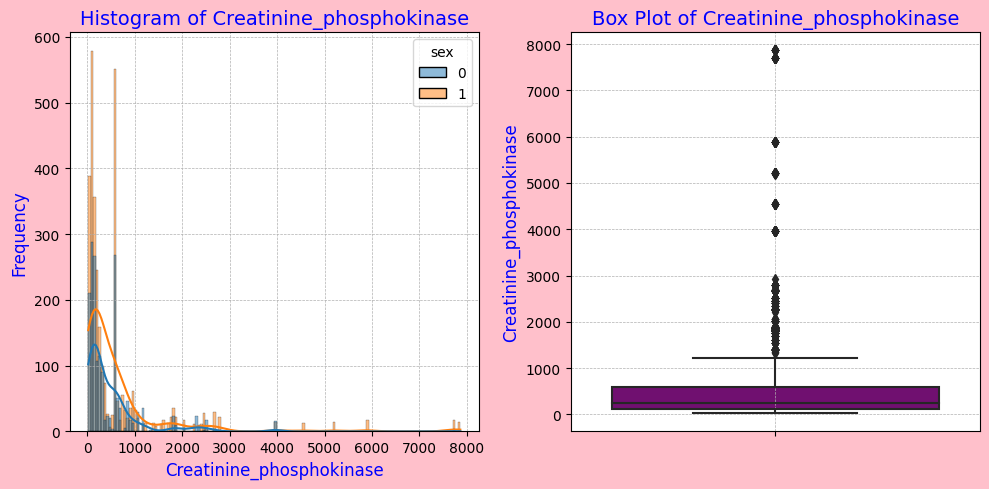

In [8]:
# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5), facecolor='pink', edgecolor='k')

# Customize the histogram plot
sns.histplot(data=df, x="creatinine_phosphokinase", kde=True, color="red", ax=ax[0], hue="sex")
# Add grid lines
ax[0].grid(True, linestyle='--', linewidth=0.5)  
# Add title to the plot
ax[0].set_title('Histogram of Creatinine_phosphokinase', fontsize=14, color='blue')
# Add axis labels
ax[0].set_xlabel('Creatinine_phosphokinase', fontsize=12, color='blue')
ax[0].set_ylabel('Frequency', fontsize=12, color='blue')

# Customize the box plot
sns.boxplot(data=df, y='creatinine_phosphokinase', color='purple', ax=ax[1])
# Add grid lines
ax[1].grid(True, linestyle='--', linewidth=0.5)  
# Add title to the plot
ax[1].set_title('Box Plot of Creatinine_phosphokinase', fontsize=14, color='blue')
# Add axis labels
ax[1].set_ylabel('Creatinine_phosphokinase', fontsize=12, color='blue')

# add some space between the plots
plt.subplots_adjust(wspace=0.4)
# Show the plot
plt.tight_layout()
plt.show()

In [9]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


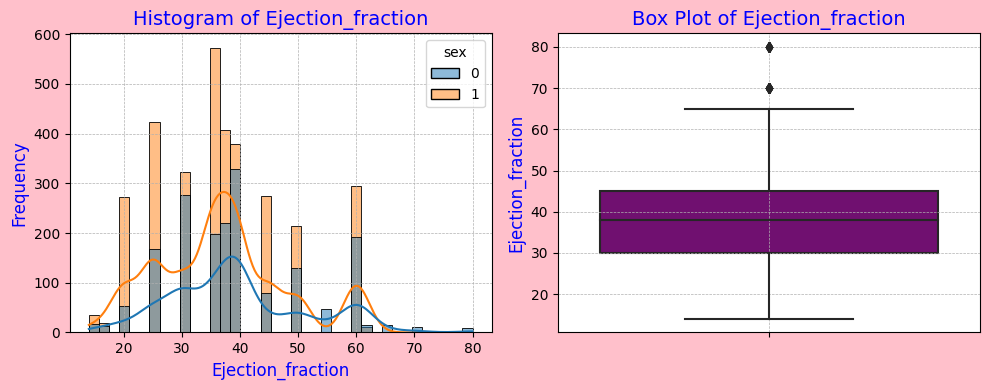

In [10]:
# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4), facecolor='pink', edgecolor='k')

# Customize the histogram plot
sns.histplot(data=df, x="ejection_fraction", kde=True, color="red", ax=ax[0], hue="sex")
# Add grid lines
ax[0].grid(True, linestyle='--', linewidth=0.5)  
# Add title to the plot
ax[0].set_title('Histogram of Ejection_fraction', fontsize=14, color='blue')
# Add axis labels
ax[0].set_xlabel('Ejection_fraction', fontsize=12, color='blue')
ax[0].set_ylabel('Frequency', fontsize=12, color='blue')

# Customize the box plot
sns.boxplot(data=df, y='ejection_fraction', color='purple', ax=ax[1])
# Add grid lines
ax[1].grid(True, linestyle='--', linewidth=0.5)  
# Add title to the plot
ax[1].set_title('Box Plot of Ejection_fraction', fontsize=14, color='blue')
# Add axis labels
ax[1].set_ylabel('Ejection_fraction', fontsize=12, color='blue')

# add some space between the plots
plt.subplots_adjust(wspace=0.4)
# Show the plot
plt.tight_layout()
plt.show()

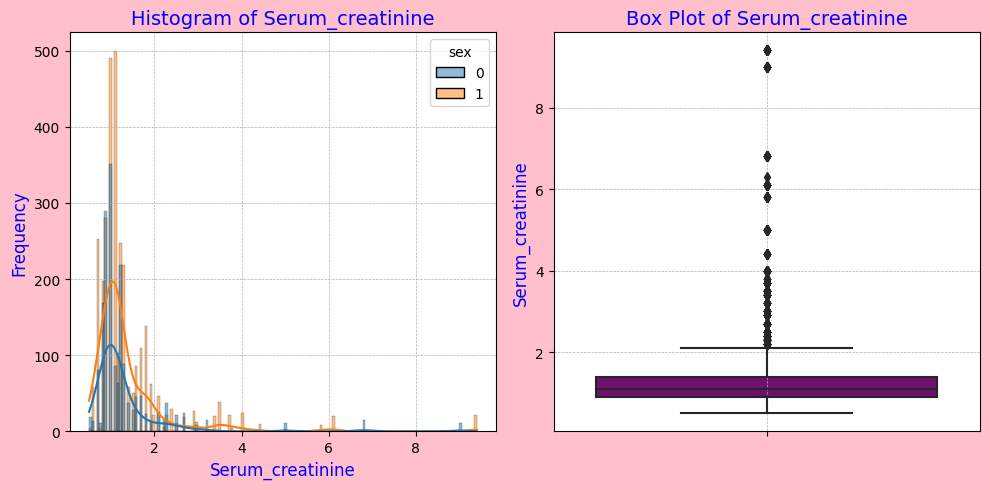

In [11]:
# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5), facecolor='pink', edgecolor='k')

# Customize the histogram plot
sns.histplot(data=df, x="serum_creatinine", kde=True, color="red", ax=ax[0], hue="sex")
# Add grid lines
ax[0].grid(True, linestyle='--', linewidth=0.5)  
# Add title to the plot
ax[0].set_title('Histogram of Serum_creatinine', fontsize=14, color='blue')
# Add axis labels
ax[0].set_xlabel('Serum_creatinine', fontsize=12, color='blue')
ax[0].set_ylabel('Frequency', fontsize=12, color='blue')

# Customize the box plot
sns.boxplot(data=df, y='serum_creatinine', color='purple', ax=ax[1])
# Add grid lines
ax[1].grid(True, linestyle='--', linewidth=0.5)  
# Add title to the plot
ax[1].set_title('Box Plot of Serum_creatinine', fontsize=14, color='blue')
# Add axis labels
ax[1].set_ylabel('Serum_creatinine', fontsize=12, color='blue')

# add some space between the plots
plt.subplots_adjust(wspace=0.4)
# Show the plot
plt.tight_layout()
plt.show()

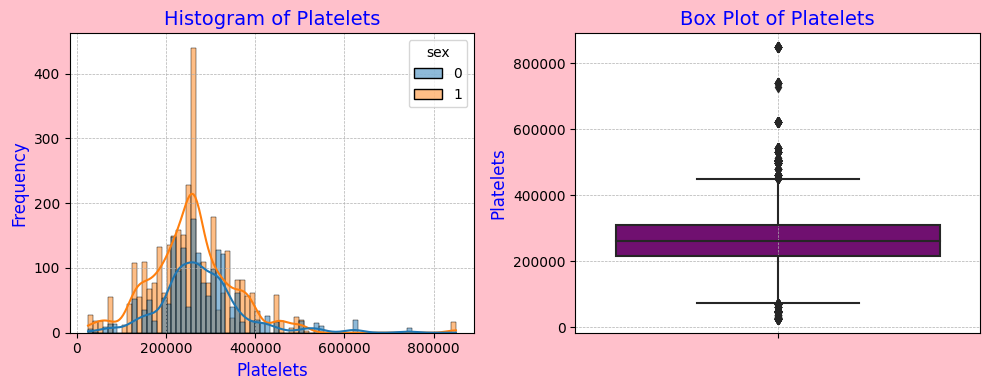

In [12]:
# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4), facecolor='pink', edgecolor='k')

# Customize the histogram plot
sns.histplot(data=df, x="platelets", kde=True, color="red", ax=ax[0], hue="sex")
# Add grid lines
ax[0].grid(True, linestyle='--', linewidth=0.5)  
# Add title to the plot
ax[0].set_title('Histogram of Platelets', fontsize=14, color='blue')
# Add axis labels
ax[0].set_xlabel('Platelets', fontsize=12, color='blue')
ax[0].set_ylabel('Frequency', fontsize=12, color='blue')

# Customize the box plot
sns.boxplot(data=df, y='platelets', color='purple', ax=ax[1])
# Add grid lines
ax[1].grid(True, linestyle='--', linewidth=0.5)  
# Add title to the plot
ax[1].set_title('Box Plot of Platelets', fontsize=14, color='blue')
# Add axis labels
ax[1].set_ylabel('Platelets', fontsize=12, color='blue')

# add some space between the plots
plt.subplots_adjust(wspace=0.4)
# Show the plot
plt.tight_layout()
plt.show()

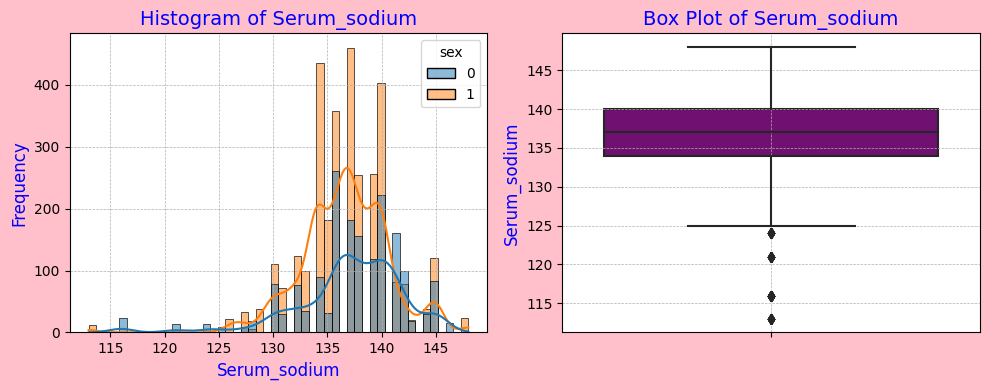

In [13]:
# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4), facecolor='pink', edgecolor='k')

# Customize the histogram plot
sns.histplot(data=df, x="serum_sodium", kde=True, color="red", ax=ax[0], hue="sex")
# Add grid lines
ax[0].grid(True, linestyle='--', linewidth=0.5)  
# Add title to the plot
ax[0].set_title('Histogram of Serum_sodium', fontsize=14, color='blue')
# Add axis labels
ax[0].set_xlabel('Serum_sodium', fontsize=12, color='blue')
ax[0].set_ylabel('Frequency', fontsize=12, color='blue')

# Customize the box plot
sns.boxplot(data=df, y='serum_sodium', color='purple', ax=ax[1])
# Add grid lines
ax[1].grid(True, linestyle='--', linewidth=0.5)  
# Add title to the plot
ax[1].set_title('Box Plot of Serum_sodium', fontsize=14, color='blue')
# Add axis labels
ax[1].set_ylabel('Serum_sodium', fontsize=12, color='blue')

# add some space between the plots
plt.subplots_adjust(wspace=0.4)
# Show the plot
plt.tight_layout()
plt.show()

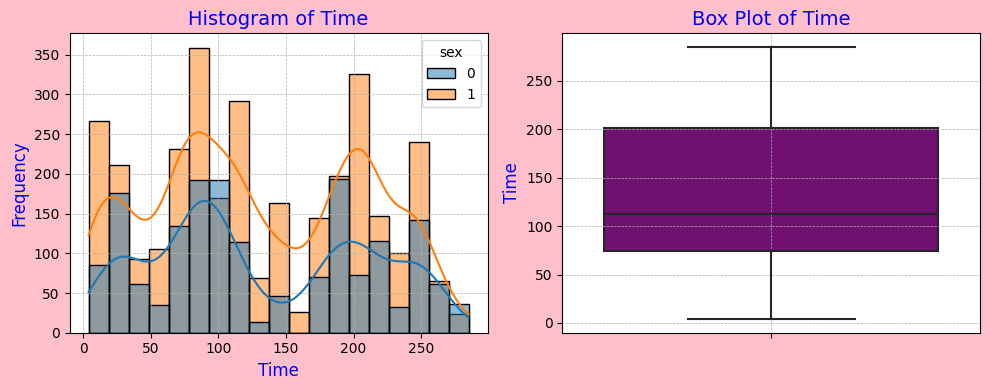

In [14]:
# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4), facecolor='pink', edgecolor='k')

# Customize the histogram plot
sns.histplot(data=df, x="time", kde=True, color="red", ax=ax[0], hue="sex")
# Add grid lines
ax[0].grid(True, linestyle='--', linewidth=0.5)  
# Add title to the plot
ax[0].set_title('Histogram of Time', fontsize=14, color='blue')
# Add axis labels
ax[0].set_xlabel('Time', fontsize=12, color='blue')
ax[0].set_ylabel('Frequency', fontsize=12, color='blue')

# Customize the box plot
sns.boxplot(data=df, y='time', color='purple', ax=ax[1])
# Add grid lines
ax[1].grid(True, linestyle='--', linewidth=0.5)  
# Add title to the plot
ax[1].set_title('Box Plot of Time', fontsize=14, color='blue')
# Add axis labels
ax[1].set_ylabel('Time', fontsize=12, color='blue')

# add some space between the plots
plt.subplots_adjust(wspace=0.4)
# Show the plot
plt.tight_layout()
plt.show()

In [15]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

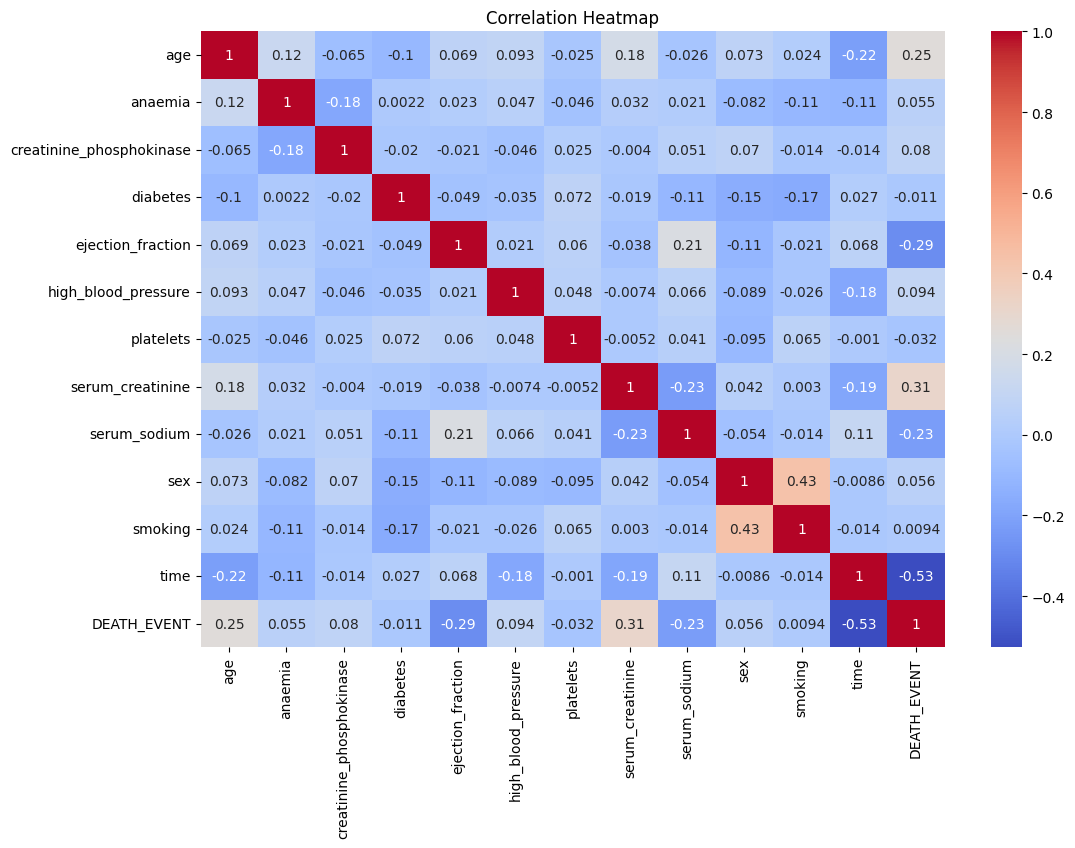

In [16]:
# correlation
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title('Correlation Heatmap')
plt.show()

<span style="font-family: cursive; 
            font-size: 36px; 
            padding: 8px 16px; 
            border-radius: 10px; 
            border: 2px solid #52c41a; /* Green */
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); 
            color: #52c41a; /* Green */
            ">
    7 | <span style="color: #52c41a; /* Green */
                     font-style: italic;
                     ">
        Data Preprocessing
    </span>
</span>

# **7. Data Preprocessing**

<span style="font-family: cursive; 
            font-size: 36px; 
            padding: 8px 16px; 
            border-radius: 10px; 
            border: 2px solid #52c41a; /* Green */
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); 
            color: #52c41a; /* Green */
            ">
    7.1 | <span style="color: #52c41a; /* Green */
                     font-style: italic;
                     ">
        Removing Outliers
    </span>
</span>


# **7.1. Removing Outliers**

In [17]:
# Remove the outliers using IQR Method
# define the first and third quartile
Q1 = np.percentile(df["creatinine_phosphokinase"], 25, interpolation = "midpoint")
Q3 = np.percentile(df["creatinine_phosphokinase"], 75, interpolation = "midpoint")

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Remove the outiers
df = df[(df["creatinine_phosphokinase"] >= lower_bound) & (df["creatinine_phosphokinase"] <= upper_bound)]

In [18]:
# Remove the outliers using IQR Method
# define the first and third quartile
Q1 = np.percentile(df["serum_creatinine"], 25, interpolation = "midpoint")
Q3 = np.percentile(df["serum_creatinine"], 75, interpolation = "midpoint")

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Remove the outiers
df = df[(df["serum_creatinine"] >= lower_bound) & (df["serum_creatinine"] <= upper_bound)]

In [19]:
# Remove the outliers using IQR Method
# define the first and third quartile
Q1 = np.percentile(df["platelets"], 25, interpolation = "midpoint")
Q3 = np.percentile(df["platelets"], 75, interpolation = "midpoint")

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Remove the outiers
df = df[(df["platelets"] >= lower_bound) & (df["platelets"] <= upper_bound)]

<Axes: xlabel='serum_sodium', ylabel='Count'>

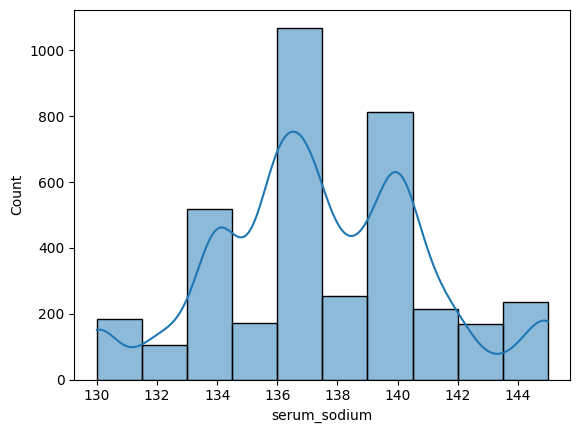

In [20]:
df = df[(df["serum_sodium"] >= 130) & (df["serum_sodium"] <= 145)]
sns.histplot(data=df, x="serum_sodium", kde=True, bins=10)

<span style="font-family: cursive; 
            font-size: 36px; 
            padding: 8px 16px; 
            border-radius: 10px; 
            border: 2px solid #52c41a; /* Green */
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); 
            color: #52c41a; /* Green */
            ">
    7.2 | <span style="color: #52c41a; /* Green */
                     font-style: italic;
                     ">
        Data Scaling
    </span>
</span>

# **7.2. Data Scaling**

In [21]:
# import the scaler
scaler = MinMaxScaler()
df["creatinine_phosphokinase"] = scaler.fit_transform(df[["creatinine_phosphokinase"]])
df["ejection_fraction"] = scaler.fit_transform(df[["ejection_fraction"]])
df["platelets"] = scaler.fit_transform(df[["platelets"]])
df["serum_sodium"] = scaler.fit_transform(df[["serum_sodium"]])
df["time"] = scaler.fit_transform(df[["time"]])

In [22]:
df.describe().T.style.set_properties(**{
    'background-color': 'lightgreen',
    'color': 'Black',
    'border-color': 'DarkBlack'
})

,count,mean,std,min,25%,50%,75%,max
age,3738.000000,60.005533,11.755792,40.000000,50.000000,60.000000,68.000000,95.000000
anaemia,3738.000000,0.508293,0.499998,0.000000,0.000000,1.000000,1.000000,1.000000
creatinine_phosphokinase,3738.000000,0.259340,0.237347,0.000000,0.074199,0.148820,0.469646,1.000000
diabetes,3738.000000,0.434992,0.495822,0.000000,0.000000,0.000000,1.000000,1.000000
ejection_fraction,3738.000000,0.356386,0.177616,0.000000,0.230769,0.353846,0.461538,1.000000
high_blood_pressure,3738.000000,0.383628,0.486334,0.000000,0.000000,0.000000,1.000000,1.000000
platelets,3738.000000,0.497342,0.190941,0.000000,0.380208,0.503537,0.611979,1.000000
serum_creatinine,3738.000000,1.117218,0.321512,0.500000,0.900000,1.100000,1.200000,2.100000
serum_sodium,3738.000000,0.496326,0.233203,0.000000,0.333333,0.466667,0.666667,1.000000
sex,3738.000000,0.629749,0.482937,0.000000,0.000000,1.000000,1.000000,1.000000


<span style="font-family: cursive; 
            font-size: 36px; 
            padding: 8px 16px; 
            border-radius: 10px; 
            border: 2px solid #52c41a; /* Green */
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); 
            color: #52c41a; /* Green */
            ">
    8 | <span style="color: #52c41a; /* Green */
                     font-style: italic;
                     ">
        Mortality Prediction by ML
    </span>
</span>

# **8. Mortality Prediction by ML**

In [23]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,0.609612,0,0.461538,0,0.503537,1.3,0.466667,1,1,0.298932,0
2,45.0,0,0.469646,1,0.353846,0,0.648438,0.9,0.666667,0,0,0.854093,0
5,70.0,0,0.174536,1,0.230769,0,0.604167,1.2,0.133333,1,0,0.733096,0
6,63.0,1,0.081788,1,0.692308,0,0.265625,1.2,1.000000,0,0,0.508897,0
7,70.0,1,0.123103,0,0.538462,1,0.750000,0.9,0.733333,0,0,0.683274,0


<span style="font-family: cursive; 
            font-size: 36px; 
            padding: 8px 16px; 
            border-radius: 10px; 
            border: 2px solid #52c41a; /* Green */
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); 
            color: #52c41a; /* Green */
            ">
    8.1 | <span style="color: #52c41a; /* Green */
                     font-style: italic;
                     ">
        Select Features and Target
    </span>
</span>

# **8.1. Select Features and Target**

In [24]:
# select feature and target variable
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

<span style="font-family: cursive; 
            font-size: 36px; 
            padding: 8px 16px; 
            border-radius: 10px; 
            border: 2px solid #52c41a; /* Green */
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); 
            color: #52c41a; /* Green */
            ">
    8.2 | <span style="color: #52c41a; /* Green */
                     font-style: italic;
                     ">
        Split data into train and test
    </span>
</span>

# **8.2 Split data into train and test**

In [25]:
# split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

<span style="font-family: cursive; 
            font-size: 36px; 
            padding: 8px 16px; 
            border-radius: 10px; 
            border: 2px solid #52c41a; /* Green */
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); 
            color: #52c41a; /* Green */
            ">
    8.3 | <span style="color: #52c41a; /* Green */
                     font-style: italic;
                     ">
        Dictionary of Models to be applied
    </span>
</span>


# **8.3. Dictionary of Models to be applied**

In [26]:
# Create a dictionaries of list of models to evaluate performance
models = { 
          'SVC' : SVC(),
          'XGBClassifier' : XGBClassifier(),
          'CatBoostClassifier' : CatBoostClassifier(verbose=False),
          'RandomForestClassifier' : RandomForestClassifier(),
          'LogisticRegression' : LogisticRegression()
          }

<span style="font-family: cursive; 
            font-size: 36px; 
            padding: 8px 16px; 
            border-radius: 10px; 
            border: 2px solid #52c41a; /* Green */
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); 
            color: #52c41a; /* Green */
            ">
    8.4 | <span style="color: #52c41a; /* Green */
                     font-style: italic;
                     ">
        Run the Models
    </span>
</span>

# **8.4. Run the Models**

In [27]:
# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

model_scores = []
for name, model in models.items():
    # fit each model from models on training data
    model.fit(X_train, y_train)
    # make prediction from each model
    y_pred = model.predict(X_test)
    metric = accuracy_score(y_test, y_pred)
    model_scores.append((name, metric))
    
# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1], reverse=False)
for model in sorted_models:
    print("Accuracy Score for", f"{model[0]} is {model[1]: .2f}")

Accuracy Score for SVC is  0.77
Accuracy Score for LogisticRegression is  0.86
Accuracy Score for XGBClassifier is  1.00
Accuracy Score for CatBoostClassifier is  1.00
Accuracy Score for RandomForestClassifier is  1.00


<span style="font-family: cursive; 
            font-size: 36px; 
            padding: 8px 16px; 
            border-radius: 10px; 
            border: 2px solid #52c41a; /* Green */
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); 
            color: #52c41a; /* Green */
            ">
    9 | <span style="color: #52c41a; /* Green */
                     font-style: italic;
                     ">
        Result
    </span>
</span>

# **9. Result**
- **XGBClassifirer** and **CatBoostClassifier** models are working best.